# Visualisation
## Graphiques Matplotlib
### Chargement du fichier

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df_conso_enrichies = pd.read_parquet("../output/consommations_enrichies.parquet")

df_conso_enrichies.info()
df_conso_enrichies.head()
df_conso_enrichies['date'] = pd.to_datetime(df_conso_enrichies['date'])

df_conso_enrichies.head(10)

<class 'pandas.DataFrame'>
RangeIndex: 10620788 entries, 0 to 10620787
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   type_energie             str           
 1   batiment_id              str           
 2   unite                    str           
 3   hour                     int32         
 4   year                     int32         
 5   month                    int32         
 6   conso_mean               float64       
 7   conso_min                float64       
 8   conso_max                float64       
 9   measurement_count        int64         
 10  date                     object        
 11  timestamp_hour           datetime64[ns]
 12  surface_m2               int32         
 13  nb_occupants_moyen       int32         
 14  type                     str           
 15  nom                      str           
 16  commune                  str           
 17  temperature_c            float64    

,type_energie,batiment_id,unite,hour,year,month,conso_mean,conso_min,conso_max,measurement_count,...,day_of_week,season,date_debut,date_fin,tarif_unitaire,cout_consommation,conso_par_occupant,conso_par_m2,ipe,ecart_a_la_moyenne
0,eau,BAT0042,m3,10,2023,1,16.25,16.25,16.25,1,...,0.0,Hiver,2024-01-01,2024-12-31,3.75,60.94,0.1806,0.0097,0.0097,-93.43
1,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2024-07-01,2024-12-31,0.12,5.97,1.2445,0.0753,0.0753,-59.90
2,eau,BAT0042,m3,10,2023,1,16.25,16.25,16.25,1,...,0.0,Hiver,2023-01-01,2023-12-31,3.50,56.88,0.1806,0.0097,0.0097,-93.43
3,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2024-01-01,2024-06-30,0.11,5.48,1.2445,0.0753,0.0753,-59.90
4,gaz,BAT0042,kWh,10,2023,1,624.68,624.68,624.68,1,...,0.0,Hiver,2024-07-01,2024-12-31,0.12,74.96,6.9409,0.3718,0.3718,515.00
5,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2023-07-01,2023-12-31,0.10,4.98,1.2445,0.0753,0.0753,-59.90
6,gaz,BAT0042,kWh,10,2023,1,624.68,624.68,624.68,1,...,0.0,Hiver,2024-01-01,2024-06-30,0.11,68.71,6.9409,0.3718,0.3718,515.00
7,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2023-01-01,2023-06-30,0.09,4.48,1.2445,0.0753,0.0753,-59.90
8,gaz,BAT0042,kWh,10,2023,1,624.68,624.68,624.68,1,...,0.0,Hiver,2023-07-01,2023-12-31,0.10,62.47,6.9409,0.3718,0.3718,515.00
9,gaz,BAT0036,kWh,7,2024,8,325.87,325.87,325.87,1,...,NaN,NaN,2024-07-01,2024-12-31,0.12,39.10,2.7616,0.1634,0.1634,216.19


### Configuration matplotlib

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

OUTPUT_DIR = "../output"
FIGURES_DIR = f"{OUTPUT_DIR}/figures"
os.makedirs(FIGURES_DIR, exist_ok=True)

### Evolution temporelle de la consommation totale par type d'énergie (line plot)

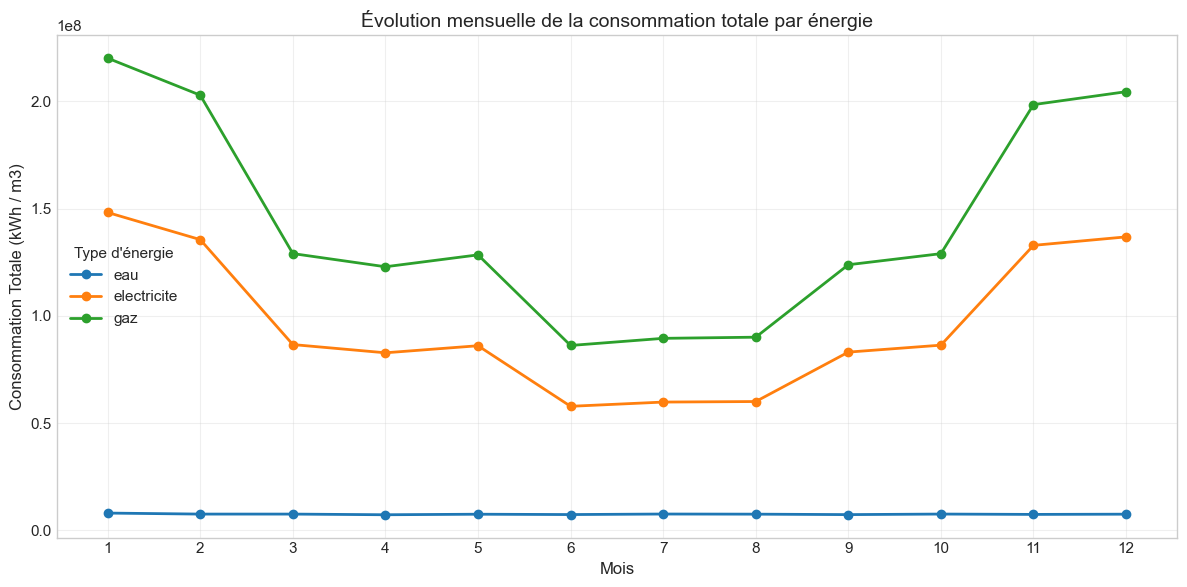

In [12]:
df_pivot = df_conso_enrichies.pivot_table(
    index='month',
    columns='type_energie', 
    values='conso_mean',
    aggfunc='sum'
)

ax = df_pivot.plot(figsize=(12, 6), marker='o', linewidth=2)

plt.title("Évolution mensuelle de la consommation totale par énergie")
plt.xlabel("Mois")
plt.ylabel("Consommation Totale (kWh / m3)")
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend(title="Type d'énergie")

plt.tight_layout() 
plt.show()


### Distribution des consommations par type de bâtiment (boxplot)

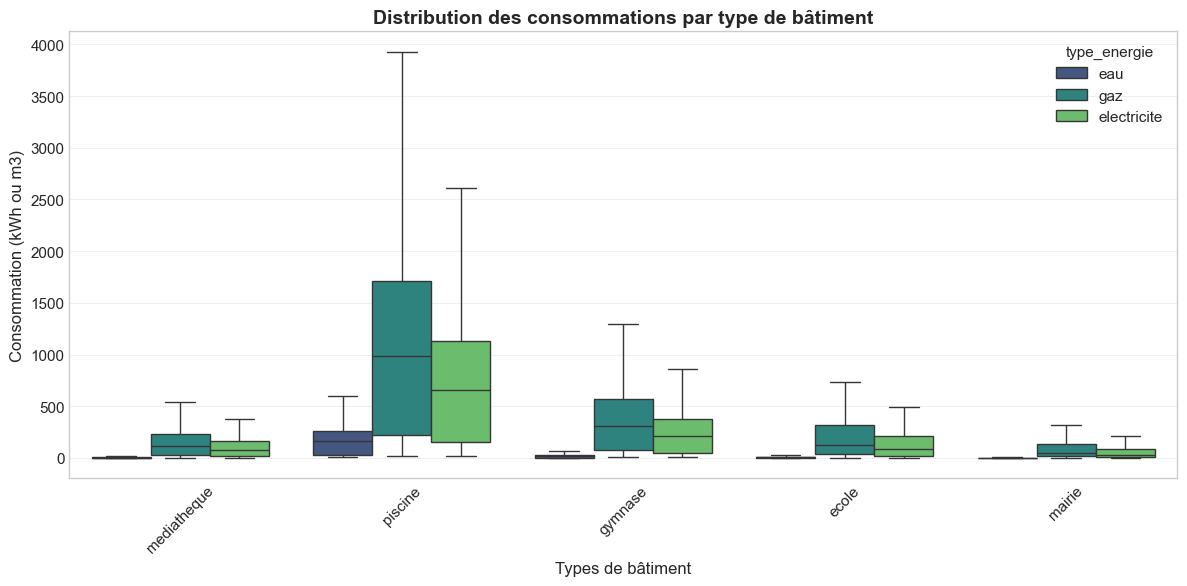

In [13]:
sns.boxplot(
    data=df_conso_enrichies, 
    x='type', 
    y='conso_mean', 
    hue='type_energie',
    palette='viridis',
    showfliers=False 
)

plt.title("Distribution des consommations par type de bâtiment", fontsize=14, fontweight="bold")
plt.xlabel("Types de bâtiment")
plt.ylabel("Consommation (kWh ou m3)")
plt.xticks(rotation=45) 

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Heatmap consommation moyenne par heure et jour de semaine

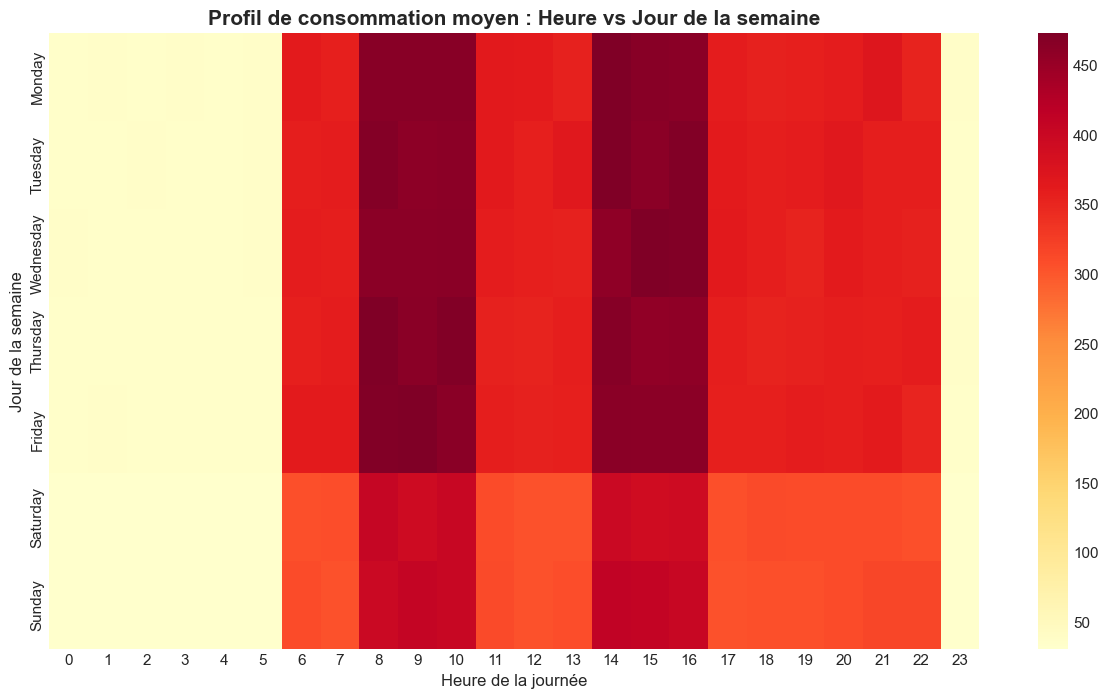

In [14]:
df_clean = df_conso_enrichies.dropna(subset=['day_of_week']).copy()

mapping_jours = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

df_clean['day_of_week_name'] = df_clean['day_of_week'].astype(int).map(mapping_jours)

heatmap_data = df_clean.pivot_table(
    index='day_of_week_name', 
    columns='hour', 
    values='conso_mean', 
    aggfunc='mean'
)


jours_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(jours_ordre)


plt.figure(figsize=(15, 8))

sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, robust=True)

plt.title("Profil de consommation moyen : Heure vs Jour de la semaine", fontsize=15, fontweight='bold')
plt.xlabel("Heure de la journée")
plt.ylabel("Jour de la semaine")
plt.show()

### Scatter plot temperature vs consommation de chauffage avec régression

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_36540\2149749953.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


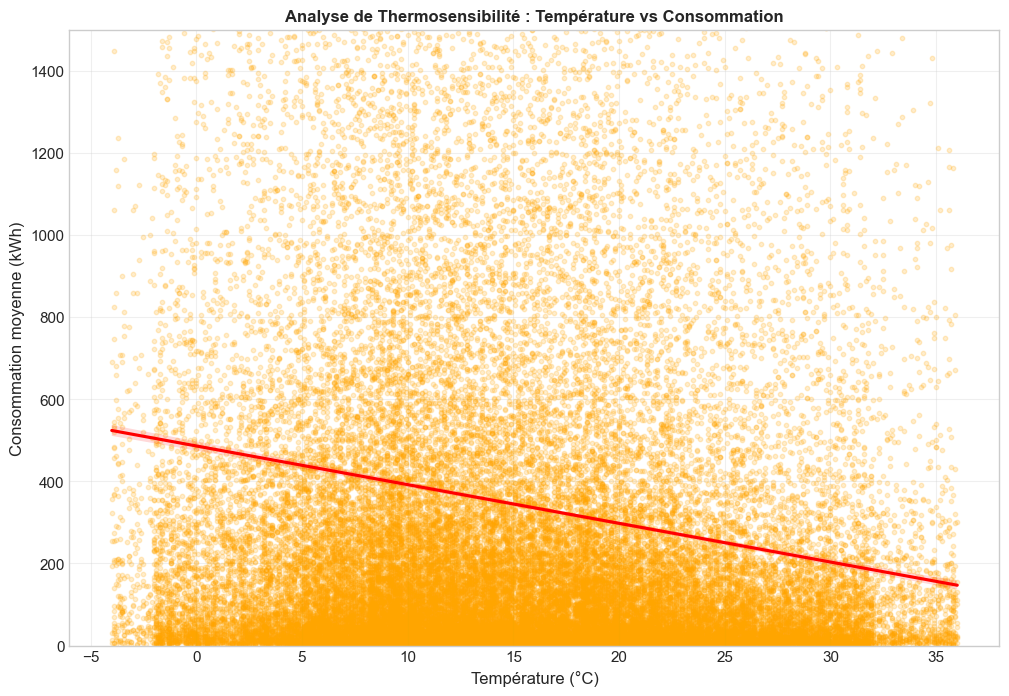

In [15]:
df_chauffage = df_conso_enrichies[df_conso_enrichies['type_energie'].isin(['gaz', 'electricite'])]

df_sample = df_chauffage.sample(n=min(50000, len(df_chauffage)), random_state=42)

plt.figure(figsize=(12, 8))

sns.regplot(
    data=df_sample, 
    x="temperature_c", 
    y="conso_mean",
    scatter_kws={'alpha':0.2, 's':10, 'color': 'orange'},
    line_kws={'color': 'red'}
)

plt.title("Analyse de Thermosensibilité : Température vs Consommation", fontsize=12, fontweight="bold")
plt.xlabel("Température (°C)")
plt.ylabel("Consommation moyenne (kWh)")
plt.legend()

plt.ylim(0, 1500)

plt.grid(True, alpha=0.3)
plt.show()

### Comparaison des consommations par classe énergetique (bar chart)

In [17]:
# "classe_energique" n'est pas dans mon dataframe, je la rajoute donc manuellement avec une jointure sur batiment_id 

df_bat_brut = pd.read_csv("../data_ecf/batiments.csv")

df_bat_light = df_bat_brut[['batiment_id', 'classe_energetique']] 

df_conso_enrichies = df_conso_enrichies.merge(df_bat_light, on='batiment_id', how='left')

print("La colonne classe_energetique a été réintégrée !")

La colonne classe_energetique a été réintégrée !


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_36540\1540483654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


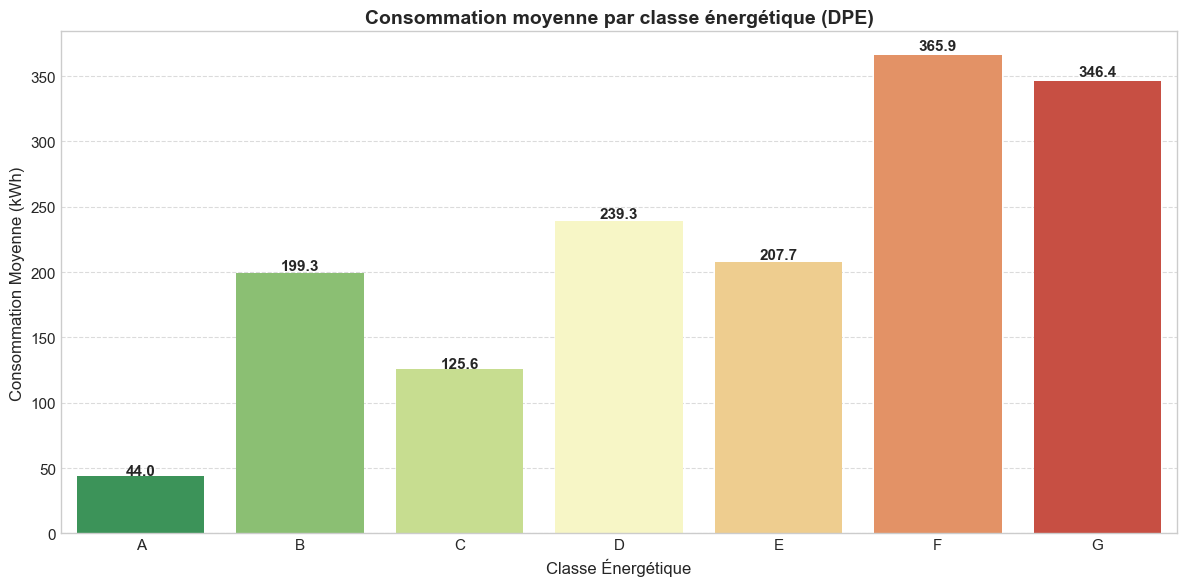

In [18]:
df_dpe_moyenne = df_conso_enrichies.groupby('classe_energetique')['conso_mean'].mean().reset_index()
ordre_dpe = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_dpe_moyenne, 
    x='classe_energetique', 
    y='conso_mean', 
    order=ordre_dpe,
    palette='RdYlGn_r' 
)


plt.title("Consommation moyenne par classe énergétique (DPE)", fontsize=14, fontweight='bold')
plt.xlabel("Classe Énergétique")
plt.ylabel("Consommation Moyenne (kWh)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(df_dpe_moyenne.set_index('classe_energetique').reindex(ordre_dpe)['conso_mean']):
    if not pd.isna(v):
        plt.text(i, v + (v * 0.01), f"{v:.1f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Export des graphiques

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_36540\1411632534.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_36540\1411632534.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


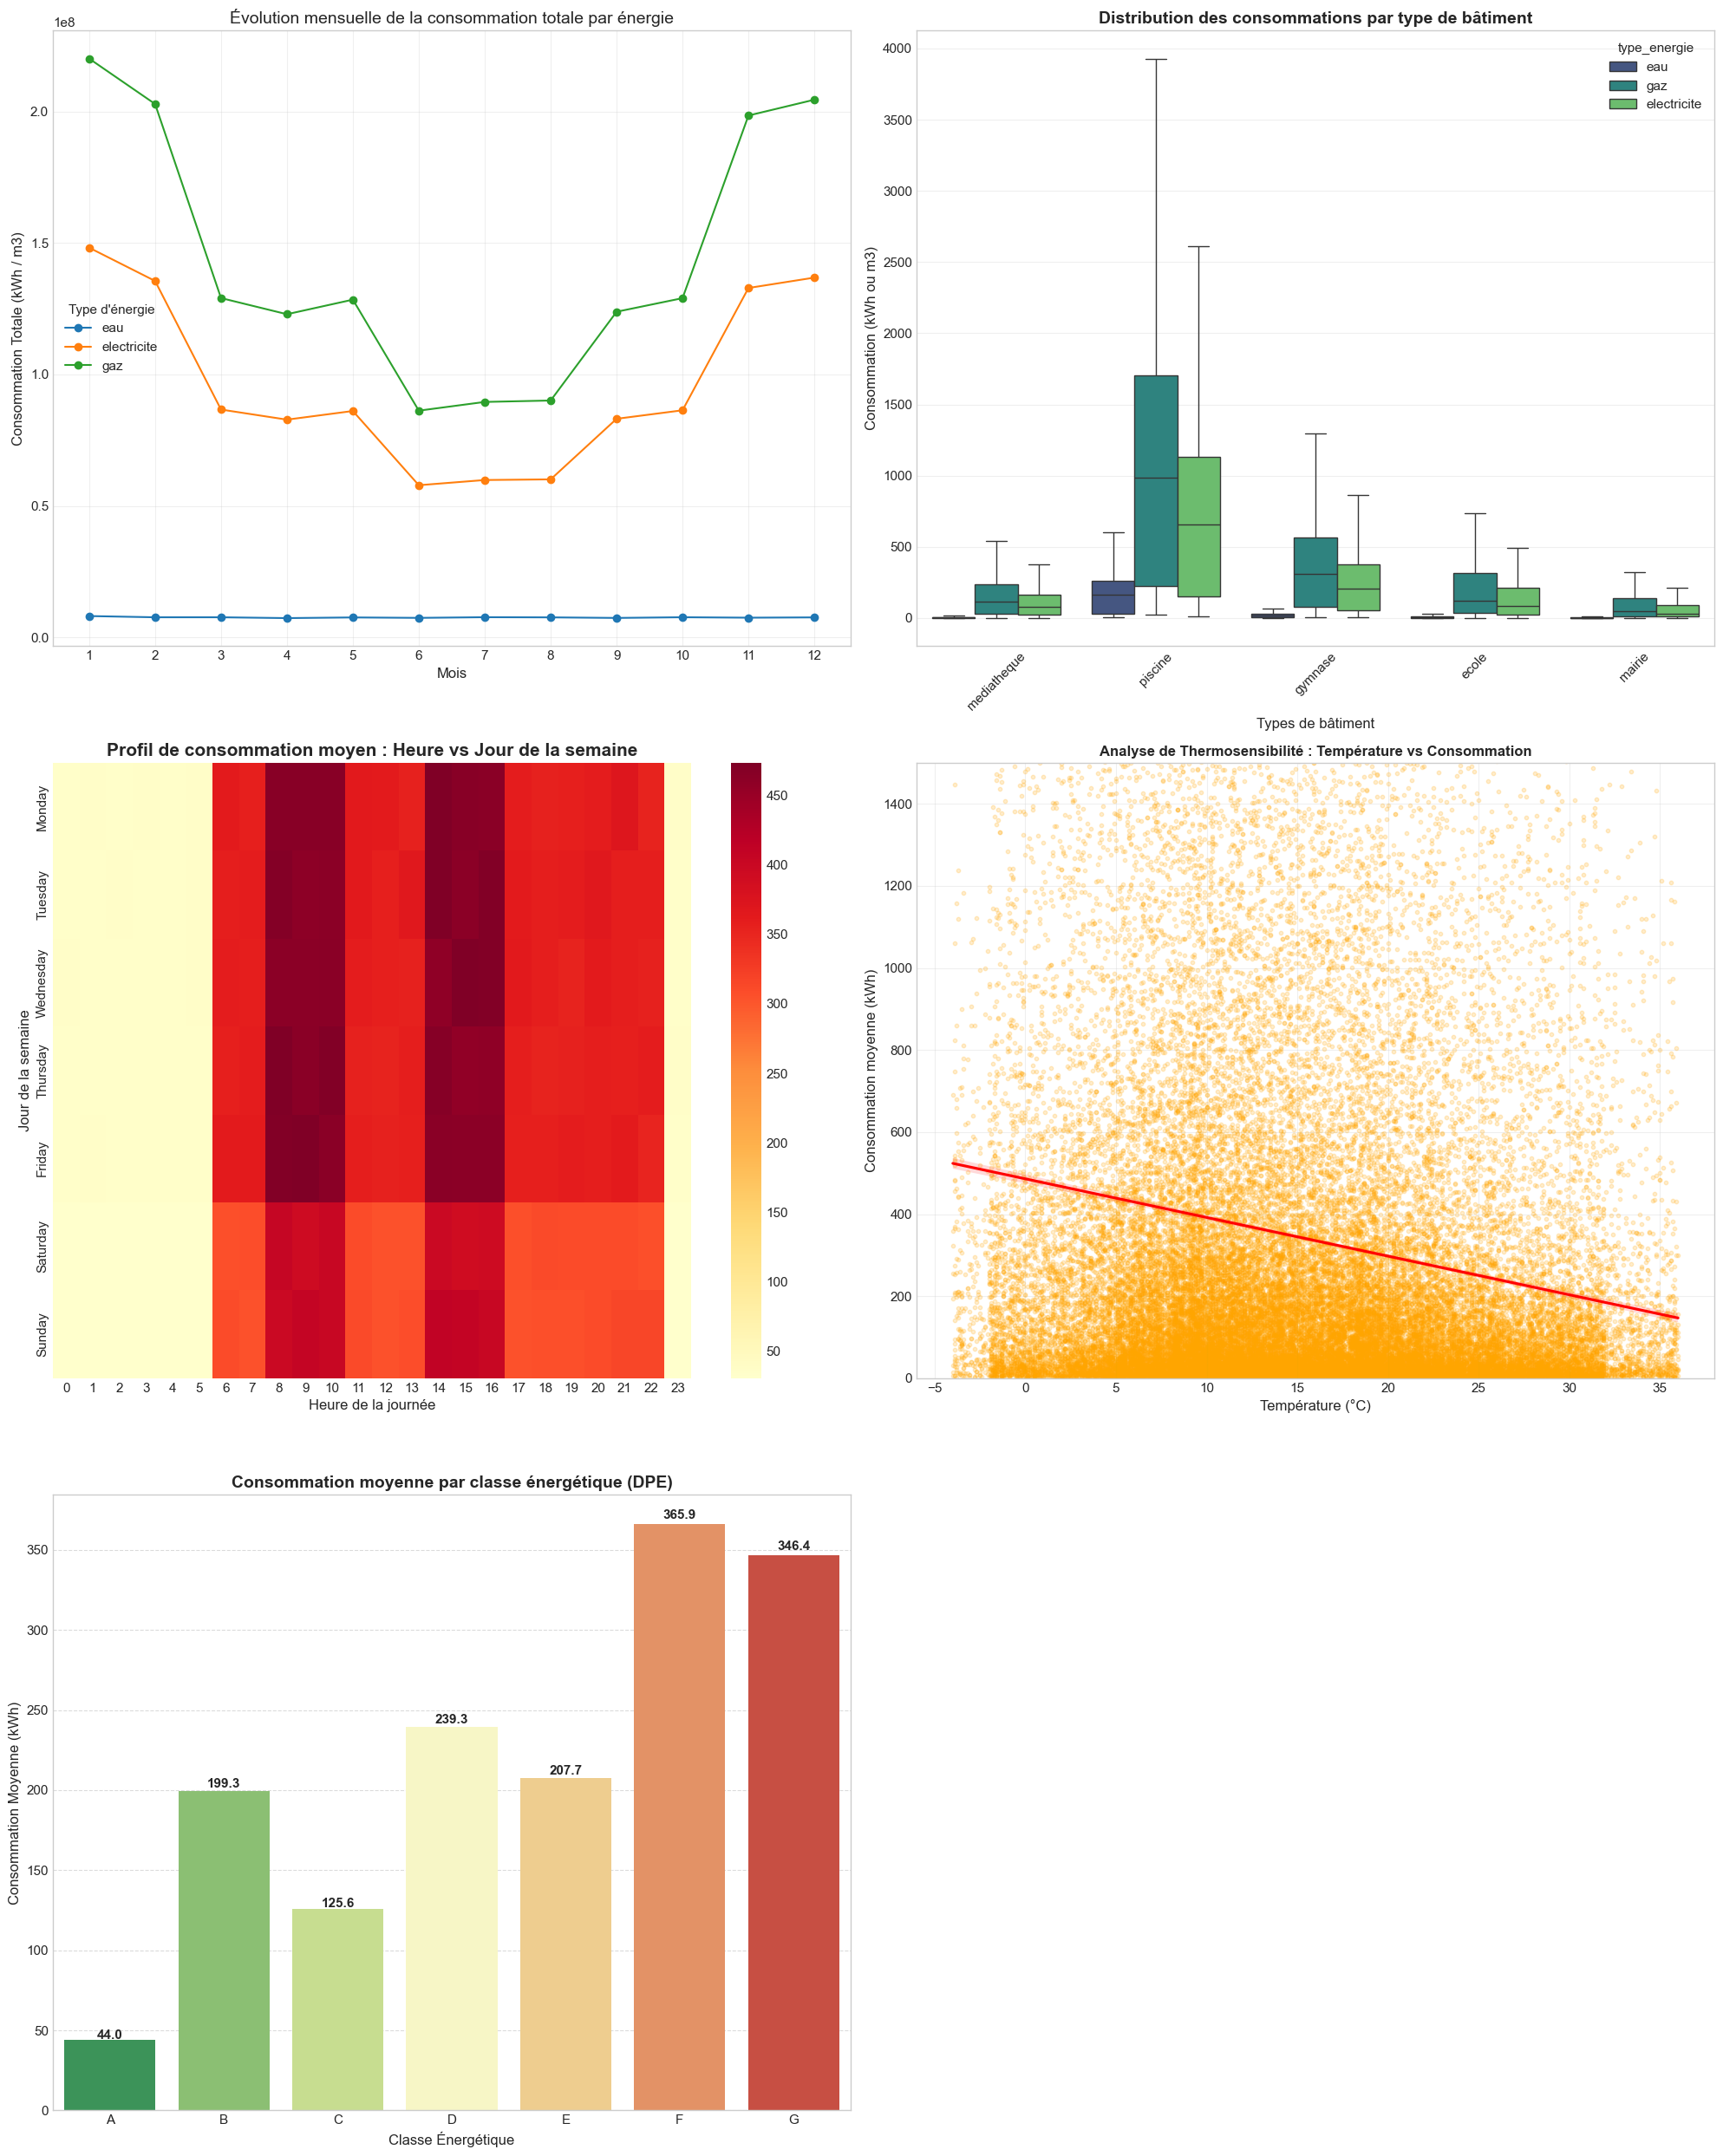

In [22]:
plt.figure(figsize=(20, 25))
plt.subplot(3, 2, 1)

for energie in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[energie], marker='o', label=energie)
plt.title("Évolution mensuelle de la consommation totale par énergie")
plt.xlabel("Mois")
plt.ylabel("Consommation Totale (kWh / m3)")
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend(title="Type d'énergie")
plt.tight_layout() 



plt.subplot(3, 2, 2)
sns.boxplot(
    data=df_conso_enrichies, 
    x='type', 
    y='conso_mean', 
    hue='type_energie',
    palette='viridis',
    showfliers=False 
)
plt.title("Distribution des consommations par type de bâtiment", fontsize=14, fontweight="bold")
plt.xlabel("Types de bâtiment")
plt.ylabel("Consommation (kWh ou m3)")
plt.xticks(rotation=45) 
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()




plt.subplot(3, 2, 3)
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, robust=True)
plt.title("Profil de consommation moyen : Heure vs Jour de la semaine", fontsize=15, fontweight='bold')
plt.xlabel("Heure de la journée")
plt.ylabel("Jour de la semaine")
plt.tight_layout() 



plt.subplot(3, 2, 4)
sns.regplot(
    data=df_sample, 
    x="temperature_c", 
    y="conso_mean",
    scatter_kws={'alpha':0.2, 's':10, 'color': 'orange'},
    line_kws={'color': 'red'}
)
plt.title("Analyse de Thermosensibilité : Température vs Consommation", fontsize=12, fontweight="bold")
plt.xlabel("Température (°C)")
plt.ylabel("Consommation moyenne (kWh)")
plt.legend()
plt.ylim(0, 1500)
plt.grid(True, alpha=0.3)
plt.tight_layout() 



plt.subplot(3, 2, 5)
sns.barplot(
    data=df_dpe_moyenne, 
    x='classe_energetique', 
    y='conso_mean', 
    order=ordre_dpe,
    palette='RdYlGn_r' 
)
plt.title("Consommation moyenne par classe énergétique (DPE)", fontsize=14, fontweight='bold')
plt.xlabel("Classe Énergétique")
plt.ylabel("Consommation Moyenne (kWh)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(df_dpe_moyenne.set_index('classe_energetique').reindex(ordre_dpe)['conso_mean']):
    if not pd.isna(v):
        plt.text(i, v + (v * 0.01), f"{v:.1f}", ha='center', fontweight='bold')
plt.tight_layout()


plt.savefig("../output/figures/visualisations_matplotlib.png", dpi=300, bbox_inches='tight')